# Analyze Silence

In [1]:
from whisperer.whisperer import get_silence_pairs

from pathlib import Path
import ipywidgets as widgets
import config.config as CONF

import torchaudio

## Load audio file

In [ ]:
audio_files = list(Path("../data/audio_files_wav").glob("*.wav"))
dropdown = widgets.Dropdown(
    options=audio_files,
    value=audio_files[0],
    description="Datasets:",
    disabled=False,
)
display(dropdown)

In [27]:
from librosa import effects

audio, sr = torchaudio.load(dropdown.value)
audio = audio.squeeze() 

# get the first 60 seconds of audio
# you can change this to whatever you want but the plotting can take a while
audio = audio[:60 * 16000]

## Configure the silence detection and plot

In [37]:
frame_length = 256
top_db = CONF.top_db
hop_length = CONF.hop_length

In [38]:

voices = effects.split(
            y=audio,
            frame_length=frame_length,
            top_db=top_db,
            hop_length=hop_length).tolist()

silences = get_silence_pairs(voices)

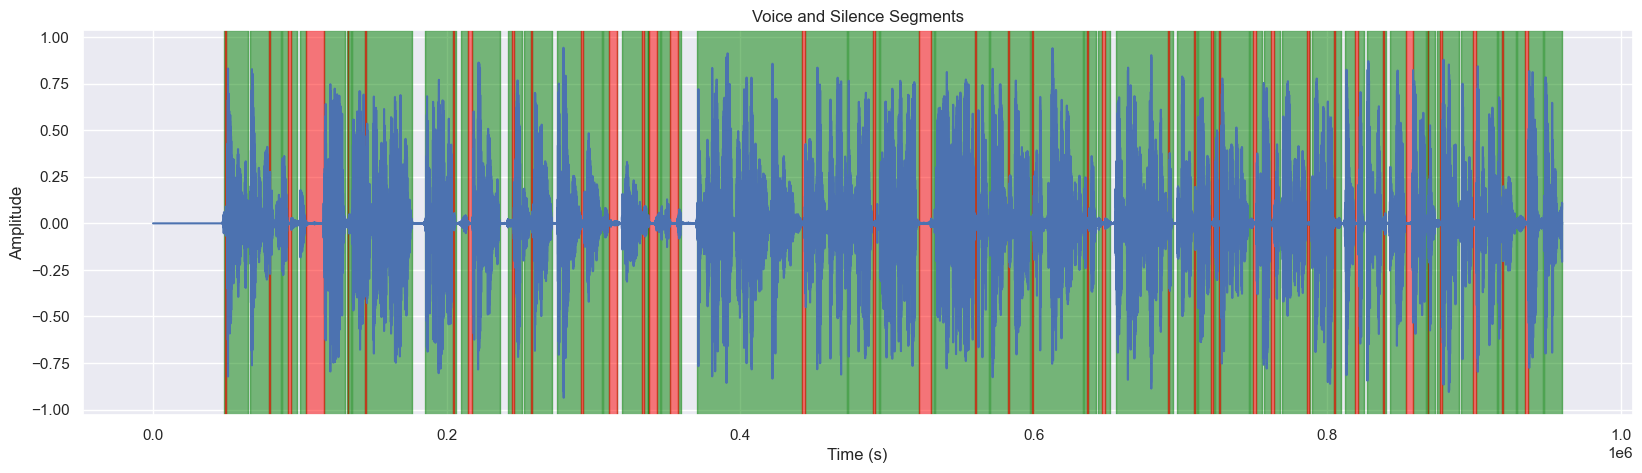

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(audio)
for start, end in voices:
    ax.axvspan(start, end, color="green", alpha=0.5)
for start, end in silences:
    ax.axvspan(start, end, color="red", alpha=0.5)

ax.set_title("Voice and Silence Segments")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Amplitude")

plt.show()